In [1]:
import os

os.chdir("..")

In [2]:
from michael_mauboussin_twin.transform import (
    vision_db,
    settings,
    datamodels as vision_datamodels,
)
import pathlib
import asyncio
from qdrant_client.http import models

vectors_config, quantization_config, optimizers_config = (
    settings.get_default_multi_vector_config(vector_size=1024)
)
vision_db_model = vision_db.VisionVectorStore.from_pretrained(
    settings.VisionEmbeddingModel(),
    settings.DBSettings(VISION_EMBEDDING_MODEL_PARAMS=settings.VisionEmbeddingModel()),
    qdrant_settings=settings.QdrantSettings(
        vector_params=vectors_config,
        scalar_params=quantization_config,
        optimizers_config=optimizers_config,
    ),
)

/home/recoverx/astarag/mj_project/Michael-J.-Mauboussin-Twin/.venv/lib/python3.11/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
results = vision_db_model.query_db("What is finance?",k=5)

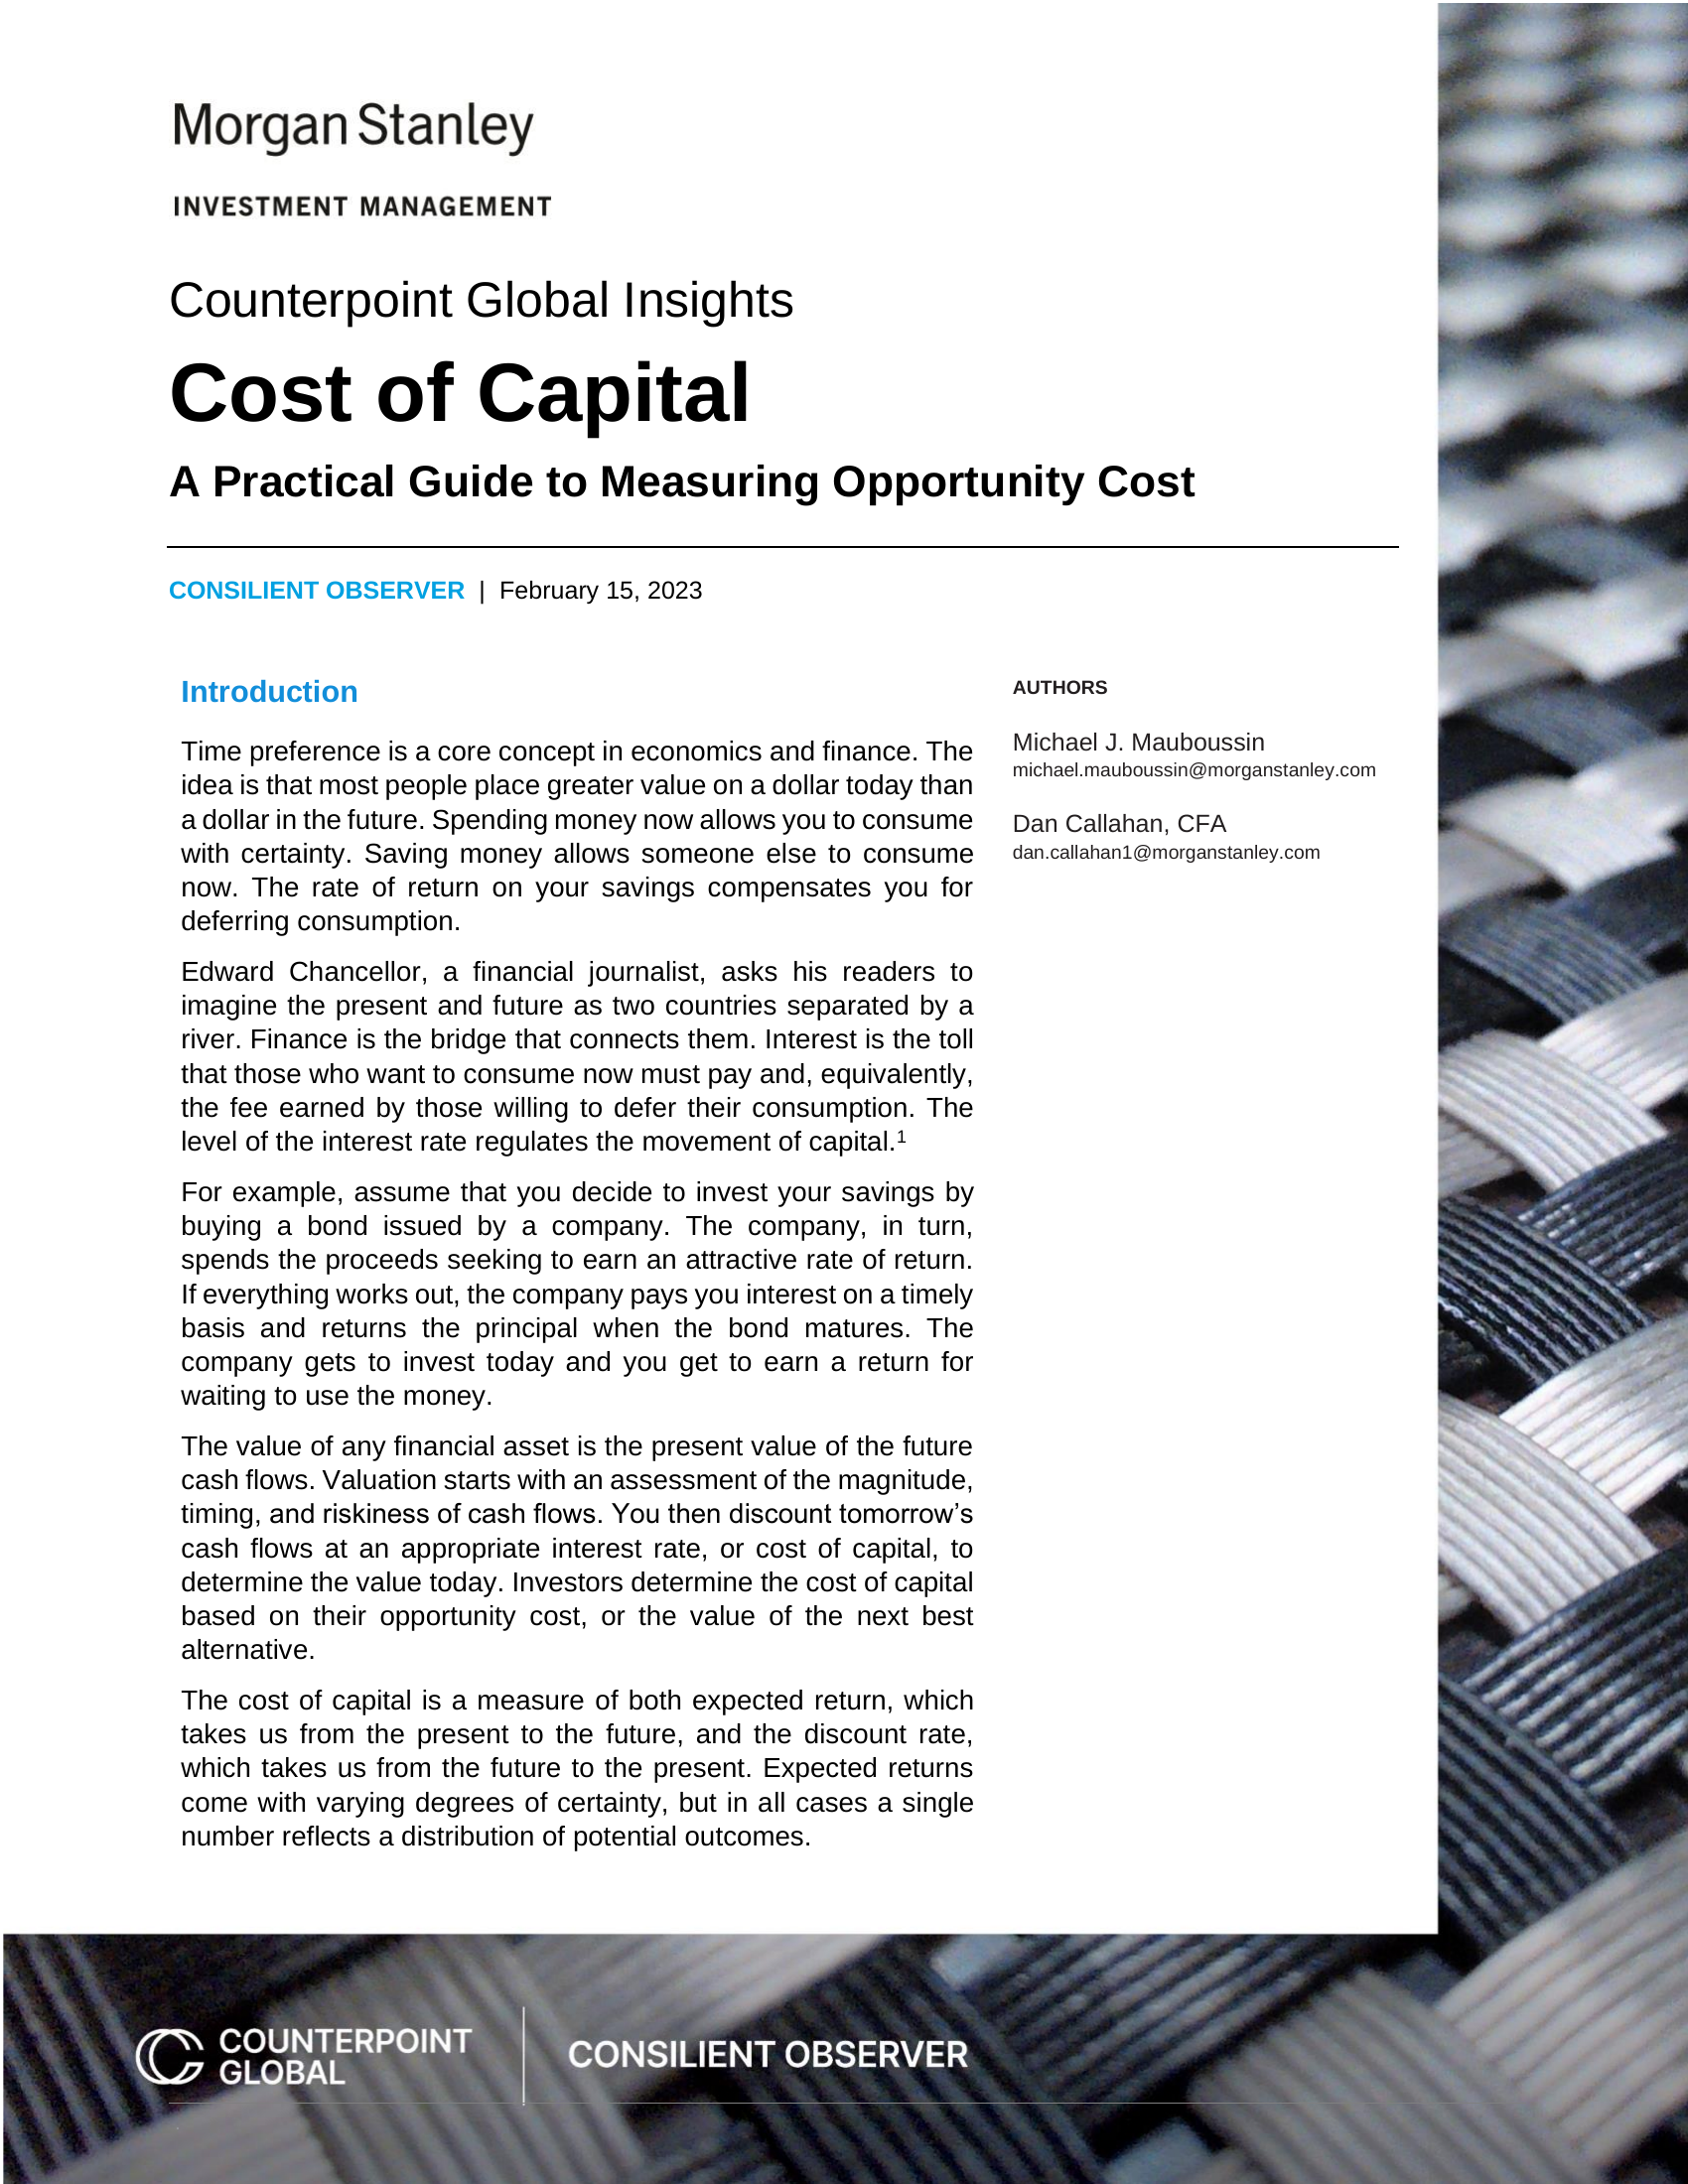

In [7]:
from michael_mauboussin_twin.transform import base  
base.base64_to_image(results[0].metadata.base64_image)